## Project: Signal Quality Prediction using Deep Learning
# Domain: Electronics and Telecommunication
# Context:
** A communications equipment manufacturing company has a product responsible for emitting informative signals. The company wants to build a deep learning ** model to predict the equipment’s signal quality using various parameters.

**Dataset Description:
**Parameters: Various measurable signal parameters.
**Signal_Quality: Final signal strength or quality.

**Project Objective:

To build a classifier that can use the given parameters to determine the signal strength or quality.

In [ ]:
#1. Data Import and Understanding

In [68]:
# 1.a.i) Read the ‘Signals.csv’ as DataFrame and import required libraries.

#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Reading dataset
data = pd.read_csv('Signal.csv')

In [69]:
# 1.a.ii)Overviewing datframe
data.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [70]:
# 1.a.iii)Overviewing dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [71]:
#1.b)Check for missing values and print percentage for each attribute.

missing_values = data.isnull().sum() / len(data) * 100
print(missing_values)


Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64


In [72]:
#1.c.i.)Check for duplicate records in the dataset and impute with the appropriate method.

duplicates = data.duplicated().sum()
duplicates

240

In [73]:
#1.c.i.) Dropping Duplicate
data = data.drop_duplicates()

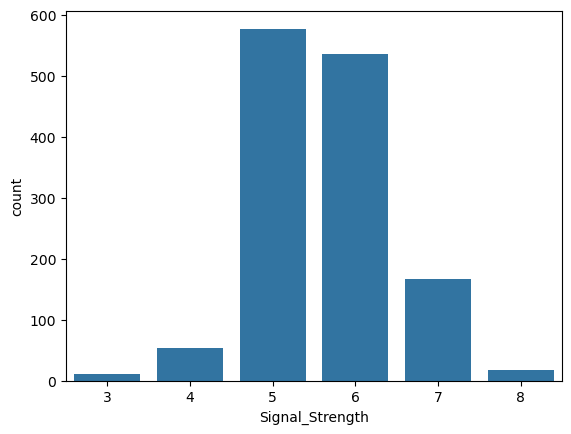

In [74]:
# 1.d.)Visualize distribution of the target variable.
sns.countplot(x='Signal_Strength', data=data)
plt.show()


In [ ]:
#.1.e.Share insights from the initial data analysis (at least 2).
#Insight 1: Distribution of signal quality shows that the dataset is imbalanced with more instances of certain quality levels.
#Insight 2: All parameters are int data type, No missing values

In [ ]:
## 2. Data preprocessing 

In [ ]:
#2.i.)Split the data into X & Y

In [75]:
X = data.drop('Signal_Strength', axis=1)
Y = data['Signal_Strength']


In [ ]:
#2.ii)Split the data into train & test with 70:30 proportion.

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [77]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors=2)
X_resampled, Y_resampled = smote.fit_resample(X_train, Y_train)


In [ ]:
#2.iii) Print shape of all the 4 variables and verify if train and test data is in sync.

In [78]:
#print(X_resampled.shape, X_test.shape, Y_resampled.shape, Y_test.shape)
X_resampled.shape, X_test.shape, Y_resampled.shape, Y_test.shape

((2430, 11), (408, 11), (2430,), (408,))

In [ ]:
#2.iv)Normalize the train and test data with appropriate method.

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)
X_test = scaler.transform(X_test)


In [ ]:
# 2.iv)Transform Labels into format acceptable by Neural Network.

In [80]:
from keras.utils import to_categorical

Y_resampled = to_categorical(Y_resampled)
Y_test = to_categorical(Y_test)


In [ ]:
## 3. Model Training & Evaluation using Neural Network# 3. Model Training & Evaluation using Neural Network

In [ ]:
#3.i) Design a Neural Network to train a classifier.

In [82]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_dim=X_resampled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(Y_resampled.shape[1], activation='softmax'))


In [ ]:
#3.ii)Train the classifier using previously designed Architecture.

In [83]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_resampled, Y_resampled, validation_data=(X_test, Y_test), epochs=50, batch_size=10)


Epoch 1/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3512 - loss: 1.8215 - val_accuracy: 0.3505 - val_loss: 1.4074
Epoch 2/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6285 - loss: 0.9649 - val_accuracy: 0.3775 - val_loss: 1.2916
Epoch 3/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6869 - loss: 0.8213 - val_accuracy: 0.4363 - val_loss: 1.2275
Epoch 4/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.7053 - loss: 0.7681 - val_accuracy: 0.4485 - val_loss: 1.2510
Epoch 5/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7321 - loss: 0.7050 - val_accuracy: 0.4265 - val_loss: 1.2947
Epoch 6/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7406 - loss: 0.6866 - val_accuracy: 0.4951 - val_loss: 1.2225
Epoch 7/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7792 - loss: 0.5978 - val_accuracy: 0.4951 - val_loss: 1.2436
Epoch 8/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7934 - loss: 0.5662 - val_accuracy: 

In [ ]:
#3.iii) Plot 2 separate visuals.
#a.) Training Loss and Validation Loss


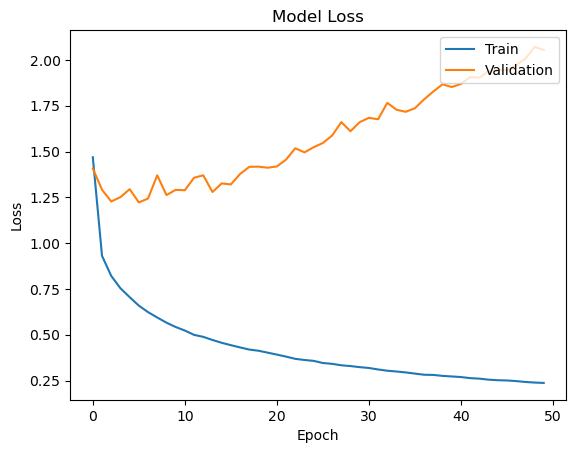

In [84]:


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [ ]:
# b.) Training Accuracy and Validation Accuracy

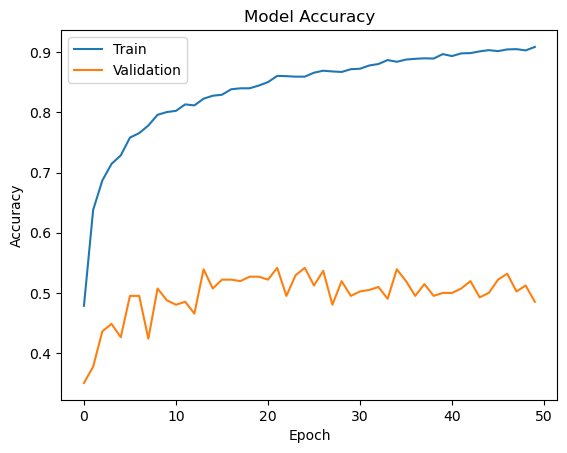

In [85]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
# 3.iv)Design new architecture/update existing architecture in attempt to improve the performance of the model.

In [87]:
model_new = Sequential()
model_new.add(Dense(32, input_dim=X_resampled.shape[1], activation='relu'))
model_new.add(Dense(64, activation='relu'))
model_new.add(Dense(Y_resampled.shape[1], activation='softmax'))

model_new.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_new = model_new.fit(X_resampled, Y_resampled, validation_data=(X_test, Y_test), epochs=50, batch_size=10)


Epoch 1/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3779 - loss: 1.7733 - val_accuracy: 0.3480 - val_loss: 1.4230
Epoch 2/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6167 - loss: 0.9758 - val_accuracy: 0.4534 - val_loss: 1.2434
Epoch 3/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6783 - loss: 0.8468 - val_accuracy: 0.4559 - val_loss: 1.2241
Epoch 4/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7111 - loss: 0.7889 - val_accuracy: 0.4730 - val_loss: 1.1993
Epoch 5/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - accuracy: 0.7271 - loss: 0.7293 - val_accuracy: 0.4951 - val_loss: 1.2177
Epoch 6/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.7445 - loss: 0.6767 - val_accuracy: 0.4853 - val_loss: 1.2224
Epoch 7/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7677 - loss: 0.6428 - val_accuracy: 0.4926 - val_loss: 1.2565
Epoch 8/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7757 - loss: 0.6252 - val_accuracy

In [ ]:
#Plot visuals as in Q3.C and share insights about difference observed in both the models.

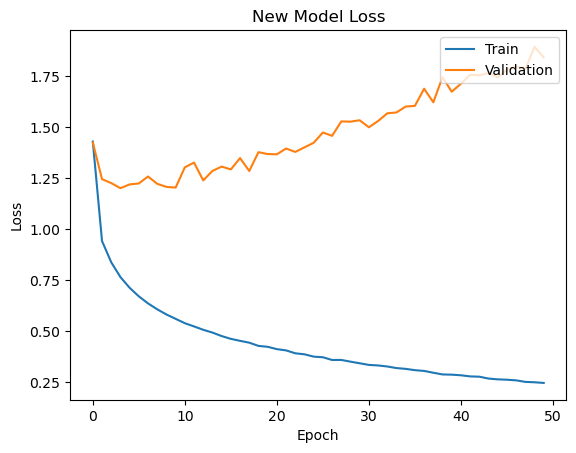

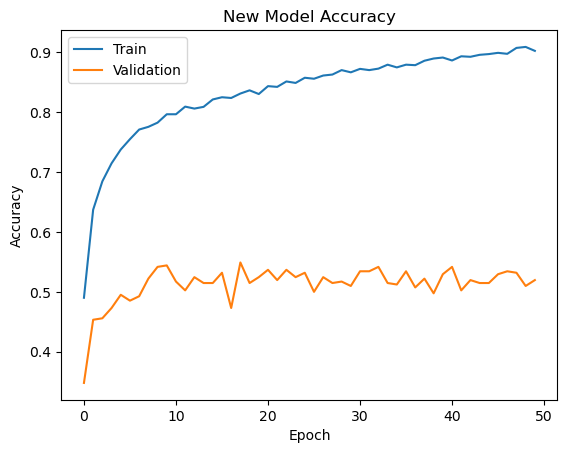

In [88]:
# Plotting for new model
##a.) Training Loss and Validation Loss
plt.plot(history_new.history['loss'])
plt.plot(history_new.history['val_loss'])
plt.title('New Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

#b.) Training Accuracy and Validation Accuracy

plt.plot(history_new.history['accuracy'])
plt.plot(history_new.history['val_accuracy'])
plt.title('New Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
# insights about difference observed in both the models.